# SIMPLE IMPLEMENTATION OF A CONVOLUTIONAL NEURAL NETWORK


## LOAD LIBRARIES

In [ ]:
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist

## Load Data

In [2]:
# x_train represents the data images(for training the model)
# y_train represents the labels to the images

# x_test represents the images for testing/evaluating the performance of the model
# y_test represents the correspong image labels for the test images

(x_train,y_train), (x_test, y_test) = mnist.load_data()

## Visualize data

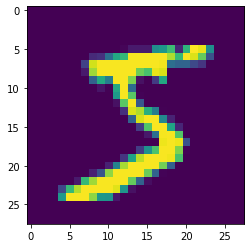

In [3]:
plt.imshow(x_train[0])

### Check data Dimension

In [4]:
print('train_data:', x_train.shape)
print('train label:', y_train.shape)

print('train_data:', x_test.shape)
print('train label:', y_test.shape)


train_data: (60000, 28, 28)
train label: (60000,)
train_data: (10000, 28, 28)
train label: (10000,)


In [ ]:
# we have 60000 images in the train set and 10000 in the test set and each image is of size 28x28

### Reshape image

In [ ]:
# Reshape only the images,don't reshape the labels of the images

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [6]:
#Now check the shape
x_test.shape

(10000, 28, 28, 1)

### Convert the labels to categorical data

In [7]:
y_train = to_categorical(y_train, 10)  # 10 represents the number of labels(0-9)
y_test = to_categorical(y_test, 10)

### Normalise the data

In [8]:
#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# pixels of images rgb images ranges from 0-255, 
x_train /=255 
x_test /=255

## Create the Model

In [ ]:
# Read the Read.md file to follow the steps in creating a CNN

In [9]:
# Create a sequential model

model = Sequential()


In [10]:
# Now let's add layers to the model

#First conv layer must include the input
model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# Maxpooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening layer
model.add(Flatten())

# Fully connected layer (number of hidden neurons)
model.add(Dense(100))

# Fully connected layer (number of data classes (in this case 10 (0-9)))
model.add(Dense(10, activation='softmax'))

In [11]:
# Print Model Summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               135300    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 136,390
Trainable params: 136,390
Non-trainable params: 0
_________________________________________________________________


### Compile the model
#### Specify the optimizer, loss and the metrics 

In [12]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

### Now lets fit/train the model on the train set and labels
#### specify the epochs and the batch_size. You can change this values to see the outcome of the accuracy

In [13]:
model.fit(x_train, y_train, epochs = 5, batch_size = 20)


Epoch 1/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.1864 - accuracy: 0.9449
Epoch 2/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0835 - accuracy: 0.9743
Epoch 3/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0669 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0543 - accuracy: 0.9833
Epoch 5/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0490 - accuracy: 0.9849


In [19]:
# after 5 epochs, we achieved a train accuracy of 98.5%. Thats pretty impressive

## Evaluate the model on a Test set

In [14]:
evaluation_score = model.evaluate(x_test,y_test, verbose=1)

print('Test Loss:',evaluation_score[0])
print('Test Accuracy:', evaluation_score[1])

10000/10000 [==============================] - 1s 55us/step
Test Loss: 0.06272950475667603
Test Accuracy: 0.9800000190734863


In [15]:
# Evaluation on the test set had an accuracy of 98%. Good job

### Let's do some prediction

7
2
1
0
4


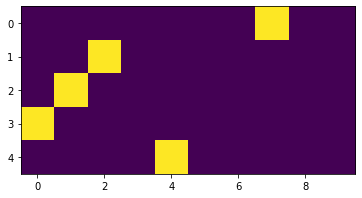

In [49]:
pred = model.predict(x_test[:5])
for i in range(len(x_test[:5])):
    print(pred[i].argmax())
plt.imshow(pred)